In [1]:
#importing necessary libraries

import numpy as np
import keras.layers
from keras.layers import Activation, Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img , img_to_array , load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Activation, Dense, Dropout ,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint 
from keras import backend as K


In [2]:

#loading data and putting them into training and test sets

#location setting for training and test datasets
train_data = 'D:\BE_Project\dataset\Training'
test_data = 'D:\BE_Project\dataset\Test'

#create X_train and Y_train using file_names and folders
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

#X_train = This includes your all independent variables,these will be used to train the model
#Y_train =  This is your dependent variable which needs to be predicted by this model, 
# this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the mode
X_train, Y_train, labels = get_data(train_data)
X_test , Y_test ,_ = get_data(test_data)

In [3]:
Y_train = np_utils.to_categorical(Y_train,120)
Y_test = np_utils.to_categorical(Y_test,120)

In [4]:
#splitting train set into training and validation sets

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [5]:
#sanity check for shape
X_val.shape

(293,)

In [6]:
#converting images into array to start computation
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train),dtype=object)
X_val = np.array(convert_image_to_array(X_val),dtype=object)
X_test = np.array(convert_image_to_array(X_test),dtype=object)

In [7]:

#Normalizing the pixel values before feeding into a neural network We will normalize our inputs y using division by 255 since 255 is the maximum possible pixel values. 
#Normalizing inputs helps neural networks run faster.

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
#CNN  model :- building a model using customized convolutional and pooling layers
model = Sequential()

#input_shape is 100*100 since that's the dimension of each of the fruit images
model.add(Conv2D(filters=16,kernel_size=2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=2,activation='relu',padding='same'))

#specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      208       
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        8

In [9]:
#In order to speed up our training, we will use Adam optimizer instead of Stochastic Gradient descent. 
#Adam takes the advantage of both the momentum and rmsprop by leading us fast to the optimized values.
#importing optimizers
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
optimizer = Adam()
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [10]:
#Its time to fit our model,we will use a batch size of 128 and check for 20 epochs.

#creating a file to save the trained CNN model
checkpointer = ModelCheckpoint('cnn_from_scratch_fruits.hdf5',verbose=1,save_best_only=True)

#fitting model using above defined layers
CNN_model = model.fit(X_train,Y_train,batch_size=128,
                      epochs=20,
                      validation_data=(X_val,Y_val),
                      callbacks= [checkpointer],
                      verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.26373, saving model to cnn_from_scratch_fruits.hdf5
10/10 - 4s - loss: 1.7292 - accuracy: 0.4820 - val_loss: 0.2637 - val_accuracy: 0.9693 - 4s/epoch - 444ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.26373 to 0.06498, saving model to cnn_from_scratch_fruits.hdf5
10/10 - 4s - loss: 0.2848 - accuracy: 0.8870 - val_loss: 0.0650 - val_accuracy: 1.0000 - 4s/epoch - 404ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.06498 to 0.00168, saving model to cnn_from_scratch_fruits.hdf5
10/10 - 4s - loss: 0.0444 - accuracy: 0.9906 - val_loss: 0.0017 - val_accuracy: 1.0000 - 4s/epoch - 390ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.00168 to 0.00011, saving model to cnn_from_scratch_fruits.hdf5
10/10 - 4s - loss: 0.0066 - accuracy: 0.9983 - val_loss: 1.0995e-04 - val_accuracy: 1.0000 - 4s/epoch - 380ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.00011 to 0.00003, saving model to cnn_from_scratch_fruits.hdf5
10/10 - 4s 

In [11]:
#loading saved weights to use further
model.load_weights('cnn_from_scratch_fruits.hdf5')

#saving weights and model in hf format
model.save_weights('my_model.hf')

In [12]:

#checking testset accuracy
score = model.evaluate(X_test,Y_test)
print('Test accuracy:',score[1])

46/46 [==============================] - 1s 24ms/step - loss: 7.3638e-07 - accuracy: 1.0000
Test accuracy: 1.0


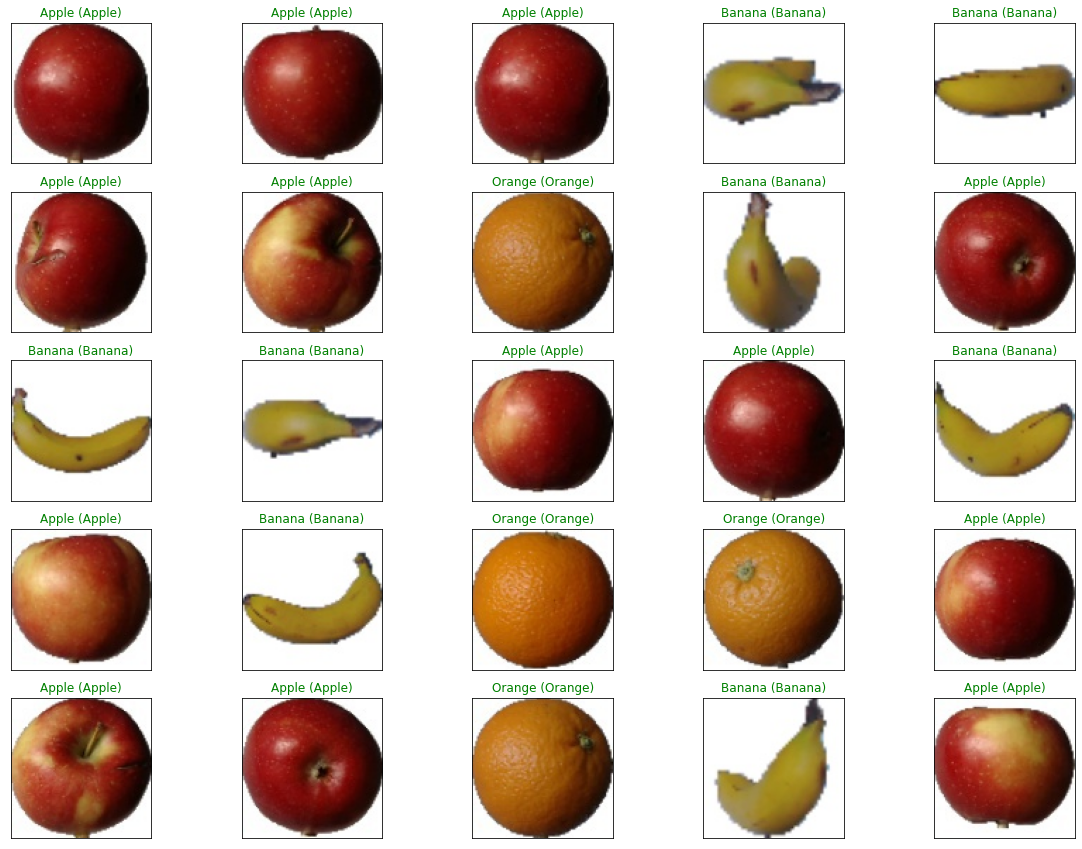

In [13]:
#using mode to predict on test data
Y_pred = model.predict(X_test)

#lets plot the predictions of different fruits and check their original labes
fig = plt.figure(figsize=(20,15))
for i, idx in enumerate(np.random.choice(X_test.shape[0],size=25,replace=False)):
    ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx],labels[true_idx]),color=("green" if pred_idx == true_idx else "red"))